In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

## HIV_Analysis_Data

In [2]:
# Load the Data
hiv_data=pd.read_csv("HIV data 2000-2023.csv",encoding="latin1")

hiv_data.head()

IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Location Period type  Period  \
0                 AGO   Angola        Year    2023   
1                 AGO   Angola        Year    2022   
2                 AGO   Angola        Year    2021   
3                 AGO   Angola        Year    2020   
4                 AGO   Angola        Year    2015   

                         Value  
0  320 000 [280 000 - 380 000]  
1  320 000 [280 000 - 380 000]  
2  320 000 [280 000 - 380 000]  
3  320 000 [280 000 - 370 000]  
4  300 000 [260 000 - 350 000]

### Summary of the data

In [3]:
hiv_data.describe()

Period
count  1552.000000
mean   2014.500000
std       8.080351
min    2000.000000
25%    2008.750000
50%    2017.500000
75%    2021.250000
max    2023.000000

In [4]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [5]:
hiv_data.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value'],
      dtype='object')

In [6]:
len(hiv_data[hiv_data["Value"]=="No data"]["Value"])

394

In [7]:
# Convert the No data entries to NaN

hiv_data["Value"]=hiv_data["Value"].replace("No data",np.nan)
hiv_data["Value"].unique()

array(['320 000 [280 000 - 380 000]', '320 000 [280 000 - 370 000]',
       '300 000 [260 000 - 350 000]', '250 000 [220 000 - 290 000]',
       '190 000 [160 000 - 220 000]', '140 000 [110 000 - 160 000]',
       '81 000 [73 000 - 93 000]', '82 000 [73 000 - 94 000]',
       '82 000 [74 000 - 94 000]', '85 000 [76 000 - 97 000]',
       '94 000 [84 000 - 110 000]', '100 000 [88 000 - 110 000]',
       '120 000 [100 000 - 140 000]', '68 000 [57 000 - 82 000]',
       '68 000 [57 000 - 83 000]', '69 000 [58 000 - 84 000]',
       '69 000 [59 000 - 84 000]', '71 000 [61 000 - 84 000]',
       '68 000 [58 000 - 80 000]', '66 000 [57 000 - 77 000]',
       '63 000 [53 000 - 74 000]', '95 000 [84 000 - 110 000]',
       '97 000 [86 000 - 110 000]', '99 000 [88 000 - 110 000]',
       '100 000 [89 000 - 120 000]', '110 000 [97 000 - 130 000]',
       '130 000 [110 000 - 150 000]', '150 000 [120 000 - 170 000]',
       '360 000 [340 000 - 380 000]', '350 000 [330 000 - 370 000]',
       '320 

In [8]:
# extract the Central value
import re


# Function to extract the central value from the range string
def extract_central_value(value):
    # If the value is not NaN or '<NA>', we process it
    if pd.notna(value):
        match = re.match(r'(\d{1,3}(?: \d{3})*)', value)  # Match the first number in the string
        if match:
            return int(match.group(1).replace(' ', ''))  # Remove spaces and convert to int
    return pd.NA  # If it doesn't match, return NaN

# Apply the extraction function to the 'Value' column
hiv_data['Value'] = hiv_data['Value'].apply(extract_central_value)

# Check the results
print(hiv_data['Value'].head())


0    320000
1    320000
2    320000
3    320000
4    300000
Name: Value, dtype: object


In [9]:
hiv_data[hiv_data["Value"].isnull()]

IndicatorCode                                          Indicator  \
40    HIV_0000000001  Estimated number of people (all ages) living w...   
41    HIV_0000000001  Estimated number of people (all ages) living w...   
42    HIV_0000000001  Estimated number of people (all ages) living w...   
43    HIV_0000000001  Estimated number of people (all ages) living w...   
44    HIV_0000000001  Estimated number of people (all ages) living w...   
...              ...                                                ...   
1547  HIV_0000000001  Estimated number of people (all ages) living w...   
1548  HIV_0000000001  Estimated number of people (all ages) living w...   
1549  HIV_0000000001  Estimated number of people (all ages) living w...   
1550  HIV_0000000001  Estimated number of people (all ages) living w...   
1551  HIV_0000000001  Estimated number of people (all ages) living w...   

     ValueType ParentLocationCode   ParentLocation Location type  \
40     numeric                AFR           Africa       Country   
41     numeric                AFR           Africa       Country   
42     numeric                AFR           Africa       Country   
43     numeric                AFR           Africa       Country   
44     numeric                AFR           Africa       Country   
...        ...                ...              ...           ...   
1547   numeric                WPR  Western Pacific       Country   
1548   numeric                WPR  Western Pacific       Country   
1549   numeric                WPR  Western Pacific       Country   
1550   numeric                WPR  Western Pacific       Country   
1551   numeric                WPR  Western Pacific       Country   

     SpatialDimValueCode                  Location Period type  Period Value  
40                   CAF  Central African Republic        Year    2023  <NA>  
41                   CAF  Central African Republic        Year    2022  <NA>  
42                   CAF  Central African Republic        Year    2021  <NA>  
43                   CAF  Central African Republic        Year    2020  <NA>  
44                   CAF  Central African Republic        Year    2015  <NA>  
...                  ...                       ...         ...     ...   ...  
1547                 WSM                     Samoa        Year    2020  <NA>  
1548                 WSM                     Samoa        Year    2015  <NA>  
1549                 WSM                     Samoa        Year    2010  <NA>  
1550                 WSM                     Samoa        Year    2005  <NA>  
1551                 WSM                     Samoa        Year    2000  <NA>  

[468 rows x 11 columns]

In [10]:
hiv_data_cleaned=hiv_data.dropna(subset=["Value"])

hiv_data_cleaned.shape

(1084, 11)

### Identify Countries that contribute to 75% of the Global Burden

In [11]:
country_hiv_totals=hiv_data_cleaned.groupby("Location")["Value"].sum().reset_index()
country_hiv_totals

Location     Value
0                           Afghanistan     47500
1                               Albania      1390
2                               Algeria    118810
3                                Angola   2160000
4                             Argentina    859000
..                                  ...       ...
139  Venezuela (Bolivarian Republic of)    724000
140                            Viet Nam   1750000
141                               Yemen     58210
142                              Zambia   8890000
143                            Zimbabwe  10900000

[144 rows x 2 columns]

In [12]:
# sort countries by total HIV cases in descending order.
country_hiv_totals_sorted = country_hiv_totals.sort_values(by='Value', ascending=False)

# Calculate the total global HIV cases
total_global_hiv = country_hiv_totals_sorted['Value'].sum()

# cummulative sum
country_hiv_totals_sorted["Cumulative Sum"]=country_hiv_totals_sorted["Value"].cumsum()
country_hiv_totals_sorted

# threshold cummulative sum
threshold=total_global_hiv*0.75
threshold


167992087.5

In [13]:
countries_75_percent=country_hiv_totals_sorted[country_hiv_totals_sorted["Cumulative Sum"]<=threshold]

#list of those countries
countries_75_percent

Location     Value Cumulative Sum
120                      South Africa  51400000       51400000
90                         Mozambique  15150000       66550000
98                            Nigeria  15000000       81550000
69                              Kenya  12000000       93550000
136       United Republic of Tanzania  11600000      105150000
143                          Zimbabwe  10900000      116050000
133                            Uganda  10500000      126550000
142                            Zambia   8890000      135440000
18                             Brazil   6070000      141510000
81                             Malawi   5760200      147270200
129                          Thailand   5430000      152700200
44                           Ethiopia   5350000      158050200
34   Democratic Republic of the Congo   4240000      162290200
30                      Cote d'Ivoire   4030000      166320200

In [14]:
countries_75_percent_list=countries_75_percent["Location"].tolist()
filtered_data=hiv_data_cleaned[hiv_data_cleaned["Location"].isin(countries_75_percent_list)]
filtered_data.head()

IndicatorCode                                          Indicator  \
48  HIV_0000000001  Estimated number of people (all ages) living w...   
49  HIV_0000000001  Estimated number of people (all ages) living w...   
50  HIV_0000000001  Estimated number of people (all ages) living w...   
51  HIV_0000000001  Estimated number of people (all ages) living w...   
52  HIV_0000000001  Estimated number of people (all ages) living w...   

   ValueType ParentLocationCode ParentLocation Location type  \
48   numeric                AFR         Africa       Country   
49   numeric                AFR         Africa       Country   
50   numeric                AFR         Africa       Country   
51   numeric                AFR         Africa       Country   
52   numeric                AFR         Africa       Country   

   SpatialDimValueCode       Location Period type  Period   Value  
48                 CIV  Cote d'Ivoire        Year    2023  420000  
49                 CIV  Cote d'Ivoire        Year    2022  430000  
50                 CIV  Cote d'Ivoire        Year    2021  430000  
51                 CIV  Cote d'Ivoire        Year    2020  440000  
52                 CIV  Cote d'Ivoire        Year    2015  460000

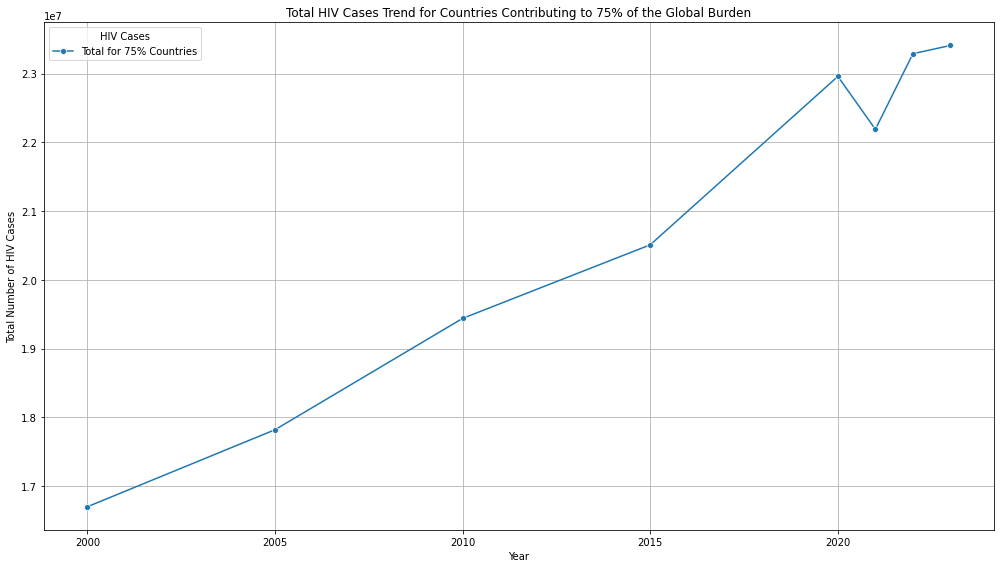

In [15]:
# Aggregate the data to get the total HIV cases for all countries contributing to 75% of the global burden
total_hiv_75_percent = filtered_data.groupby('Period')['Value'].sum().reset_index()

# Plot the combined trend for the 75% countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=total_hiv_75_percent, x='Period', y='Value', marker='o', label='Total for 75% Countries')

# Customize the plot
plt.title('Total HIV Cases Trend for Countries Contributing to 75% of the Global Burden')
plt.xlabel('Year')
plt.ylabel('Total Number of HIV Cases')
plt.legend(title='HIV Cases')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


### Generate a visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions)

In [16]:
hiv_trends_by_region=filtered_data.groupby(["ParentLocation","Period"])["Value"].sum().reset_index()
hiv_trends_by_region.head()

ParentLocation  Period     Value
0         Africa    2000  15430000
1         Africa    2005  16520000
2         Africa    2010  18080000
3         Africa    2015  19100100
4         Africa    2020  21460000

In [17]:
# list of unique WHO regions in the 75% HIV burden
region=hiv_trends_by_region["ParentLocation"].unique()
region

array(['Africa', 'Americas', 'South-East Asia'], dtype=object)

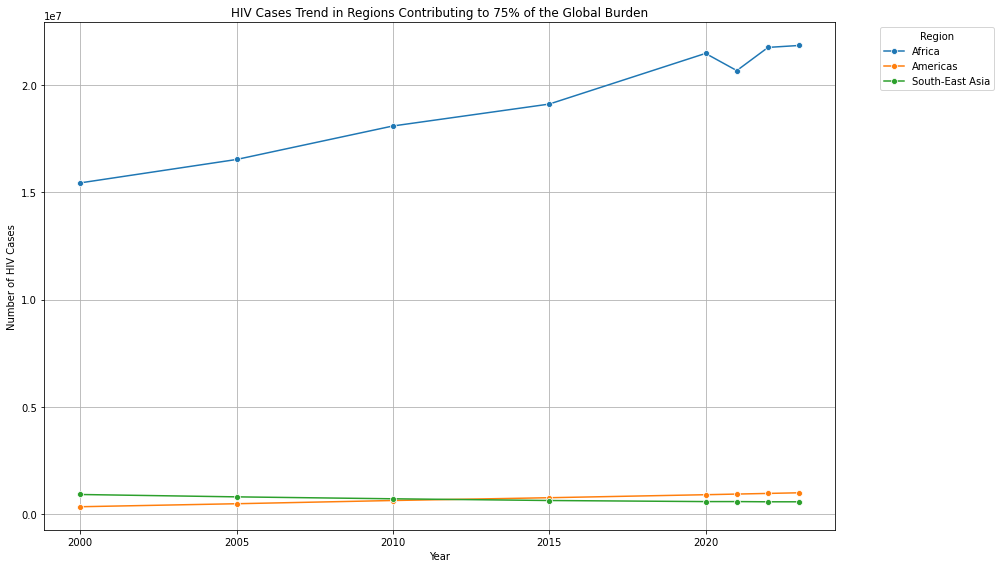

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=hiv_trends_by_region, x='Period', y='Value', hue='ParentLocation', marker='o')

# Customize the plot
plt.title('HIV Cases Trend in Regions Contributing to 75% of the Global Burden')
plt.xlabel('Year')
plt.ylabel('Number of HIV Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Global HIV Burden and Poverty Analysis (2000â€“2023)

In [19]:
povery_df=pd.read_excel("./multidimensional_poverty.xlsx",skiprows=2)
povery_df.head()

# rename the columns for better use
povery_df.columns = [
    "Region", "CountryCode", "Location", "Period", "SurveyName", 
    "SurveyYear", "SurveyCoverage", "WelfareType", "SurveyComparability", 
    "MonetaryDeprivation", "EducationalAttainmentDeprivation", 
    "EducationalEnrollmentDeprivation", "ElectricityDeprivation", 
    "SanitationDeprivation", "DrinkingWaterDeprivation", "PovertyHeadcount"
]
povery_df

Region CountryCode    Location  Period SurveyName  SurveyYear  \
0      SSA         AGO      Angola    2018      IDREA        2018   
1      ECA         ALB     Albania    2012        HBS        2018   
2      LAC         ARG   Argentina    2010    EPHC-S2        2021   
3      ECA         ARM     Armenia    2010       ILCS        2021   
4      EAP         AUS   Australia    2010    SIH-LIS        2018   
..     ...         ...         ...     ...        ...         ...   
105    ECA         UZB  Uzbekistan    2022        HBS        2022   
106    EAP         VNM    Viet Nam    2010      VHLSS        2022   
107    EAP         VUT     Vanuatu    2010       NSDP        2019   
108    SSA         ZMB      Zambia    2010  LCMS-VIII        2022   
109    SSA         ZWE    Zimbabwe    2017      PICES        2019   

    SurveyCoverage WelfareType  SurveyComparability  MonetaryDeprivation  \
0                N           c                    2            31.122005   
1                N           c                    1             0.048107   
2                U           i                    3             0.894218   
3                N           c                    1             0.523521   
4                N           I                    3             0.516880   
..             ...         ...                  ...                  ...   
105              N           c                    1             2.253092   
106              N           c                    2             0.963795   
107              N           c                    0             9.963333   
108              N           c                    4            64.341974   
109              N           c                    0            39.754534   

    EducationalAttainmentDeprivation EducationalEnrollmentDeprivation  \
0                          29.753423                         27.44306   
1                            0.19238                                -   
2                            1.08532                         0.731351   
3                                  0                         1.793004   
4                            1.71188                                -   
..                               ...                              ...   
105                                0                                -   
106                         3.384816                         1.841407   
107                        25.723079                        13.404277   
108                        16.267821                         23.39835   
109                         0.927006                         5.984225   

    ElectricityDeprivation SanitationDeprivation DrinkingWaterDeprivation  \
0                52.639532             53.637516                32.106507   
1                  0.06025              6.579772                 9.594966   
2                        0              0.257453                 0.364048   
3                        0              0.397725                 0.660082   
4                        0                     0                        -   
..                     ...                   ...                      ...   
105                0.12747             21.786885                10.693686   
106               0.079733              4.132901                 1.968127   
107              26.994166             42.970088                11.813611   
108              45.135146             53.505135                26.849246   
109              37.994787             38.285229                19.260145   

     PovertyHeadcount  
0           47.203606  
1            0.293161  
2            0.906573  
3            0.523521  
4            2.215770  
..                ...  
105          2.253092  
106          1.266184  
107         19.892171  
108         66.506058  
109         42.397931  

[110 rows x 16 columns]

In [20]:
povery_df.shape

(110, 16)

In [21]:

povery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region                            110 non-null    object 
 1   CountryCode                       110 non-null    object 
 2   Location                          110 non-null    object 
 3   Period                            110 non-null    int64  
 4   SurveyName                        110 non-null    object 
 5   SurveyYear                        110 non-null    int64  
 6   SurveyCoverage                    110 non-null    object 
 7   WelfareType                       110 non-null    object 
 8   SurveyComparability               110 non-null    int64  
 9   MonetaryDeprivation               110 non-null    float64
 10  EducationalAttainmentDeprivation  110 non-null    object 
 11  EducationalEnrollmentDeprivation  110 non-null    object 
 12  Electric

In [22]:
# replace the - with NaN
povery_df.replace("-",pd.NA,inplace=True)
povery_df
# convert columns to numeric where possible
povery_df=povery_df.apply(pd.to_numeric,errors="ignore")

povery_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region                            110 non-null    object 
 1   CountryCode                       110 non-null    object 
 2   Location                          110 non-null    object 
 3   Period                            110 non-null    int64  
 4   SurveyName                        110 non-null    object 
 5   SurveyYear                        110 non-null    int64  
 6   SurveyCoverage                    110 non-null    object 
 7   WelfareType                       110 non-null    object 
 8   SurveyComparability               110 non-null    int64  
 9   MonetaryDeprivation               110 non-null    float64
 10  EducationalAttainmentDeprivation  109 non-null    float64
 11  EducationalEnrollmentDeprivation  74 non-null     float64
 12  Electric

/tmp/ipykernel_26414/4159746620.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  povery_df=povery_df.apply(pd.to_numeric,errors="ignore")


# column with nulls=
1. EducationalAttainmentDeprivation-1
2. EducationalEnrollmentDeprivation -36
3. ElectricityDeprivation -1
4. SanitationDeprivation 25
5. DrinkingWaterDeprivation -9


In [23]:
# Drop rows where critical columns have missing values
critical_columns = ['EducationalAttainmentDeprivation', 'ElectricityDeprivation']
povery_df = povery_df.dropna(subset=critical_columns)

### Handling Null Values in Sanitation and Drinking Water Deprivation

For columns like `SanitationDeprivation` and `DrinkingWaterDeprivation`, the null values are **genuine** â€” meaning that in some countries, data was simply not collected.

**Decision:**  
ðŸ‘‰ We will **leave these null values as they are**.

**Reasoning:**
- Filling them with zeros, averages, or other values would **introduce fake data**, leading to **misleading analysis**.
- Most visualization libraries like **pandas**, **seaborn**, and **matplotlib** automatically **ignore null values** when plotting, so they will not cause any errors.
- Leaving them as nulls preserves the integrity of the dataset and allows for cleaner filtering if needed later.

> âœ… This approach maintains **data honesty** and **ensures more accurate visualizations**.


In [24]:
# let merge the Two DataFrames

merged_data=pd.merge(hiv_data_cleaned,povery_df,on=['Location','Period'])
merged_data.head()

IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode       Location Period type  Period  ... SurveyCoverage  \
0                 BEN          Benin        Year    2015  ...              N   
1                 CIV  Cote d'Ivoire        Year    2015  ...              N   
2                 GNB  Guinea-Bissau        Year    2010  ...              N   
3                 KEN          Kenya        Year    2015  ...              N   
4                 MWI         Malawi        Year    2010  ...              N   

  WelfareType SurveyComparability MonetaryDeprivation  \
0           c                   1           12.723279   
1           c                   2            9.733193   
2           c                   3           25.962856   
3           c                   3           36.146057   
4           c                   1           70.060599   

   EducationalAttainmentDeprivation EducationalEnrollmentDeprivation  \
0                         49.023893                        31.661823   
1                         44.493997                        24.717054   
2                         20.071073                        31.059781   
3                         10.055726                         1.179968   
4                         54.329389                         3.686354   

  ElectricityDeprivation  SanitationDeprivation  DrinkingWaterDeprivation  \
0              34.818304              76.649594                 24.109130   
1               9.264950              59.909374                 17.286547   
2              27.570510              60.362864                 20.897064   
3              24.500306              22.312516                 36.060327   
4              88.757396              75.137657                 11.400399   

   PovertyHeadcount  
0         45.443240  
1         29.177094  
2         38.730049  
3         38.490102  
4         78.252000  

[5 rows x 25 columns]

In [25]:
merged_data.describe()

Period   SurveyYear  SurveyComparability  MonetaryDeprivation  \
count    35.000000    35.000000            35.000000            35.000000   
mean   2011.114286  2020.742857             2.485714             7.923862   
std       3.065668     1.171797             1.502379            16.653118   
min    2010.000000  2018.000000             0.000000             0.000000   
25%    2010.000000  2021.000000             1.000000             0.357184   
50%    2010.000000  2021.000000             2.000000             1.108257   
75%    2010.000000  2021.000000             3.000000             5.246891   
max    2022.000000  2022.000000             7.000000            70.060599   

       EducationalAttainmentDeprivation  EducationalEnrollmentDeprivation  \
count                         35.000000                         30.000000   
mean                           9.748065                          6.681360   
std                           13.946076                          9.970805   
min                            0.000000                          0.452292   
25%                            1.678713                          1.187506   
50%                            3.724001                          2.167877   
75%                           11.151675                          5.110386   
max                           54.329389                         31.661823   

       ElectricityDeprivation  SanitationDeprivation  \
count               35.000000              34.000000   
mean                 7.709145              16.240868   
std                 17.751604              22.126769   
min                  0.000000               0.000000   
25%                  0.001366               1.656889   
50%                  0.315518               6.925026   
75%                  5.357301              19.874014   
max                 88.757396              76.649594   

       DrinkingWaterDeprivation  PovertyHeadcount  
count                 32.000000         35.000000  
mean                   6.500046         11.034388  
std                    8.938656         19.499333  
min                    0.000000          0.012860  
25%                    1.011665          0.715047  
50%                    2.935739          2.171141  
75%                    5.889482          7.152978  
max                   36.060327         78.252000

In [26]:
merged_data.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value', 'Region', 'CountryCode', 'SurveyName',
       'SurveyYear', 'SurveyCoverage', 'WelfareType', 'SurveyComparability',
       'MonetaryDeprivation', 'EducationalAttainmentDeprivation',
       'EducationalEnrollmentDeprivation', 'ElectricityDeprivation',
       'SanitationDeprivation', 'DrinkingWaterDeprivation',
       'PovertyHeadcount'],
      dtype='object')

In [27]:
# After Step 3 (Rename columns), Insert:

# Step 4: Ensure numeric types and clean missing data
cols_to_numeric = ['Value', 'PovertyHeadcount', 'MonetaryDeprivation', 
                   'EducationalAttainmentDeprivation', 'EducationalEnrollmentDeprivation', 
                   'ElectricityDeprivation', 'SanitationDeprivation', 'DrinkingWaterDeprivation']

for col in cols_to_numeric:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows with missing values
merged_data = merged_data.dropna(subset=cols_to_numeric)

# Step 5: Inspect cleaned data
print(merged_data[['Location', 'Period', 'Value', 'PovertyHeadcount']].head())


        Location  Period    Value  PovertyHeadcount
0          Benin    2015    71000         45.443240
1  Cote d'Ivoire    2015   460000         29.177094
2  Guinea-Bissau    2010    37000         38.730049
3          Kenya    2015  1500000         38.490102
4         Malawi    2010   930000         78.252000


In [28]:
# Checking the Relationships
import statsmodels.api as sm
import statsmodels.formula.api as smf


merged_data = merged_data.rename(columns={
    'Location': 'Country',
    'Period': 'Year'
})

# Step 4: Inspect the merged data
print(merged_data[['Country', 'Year', 'Value', 'MonetaryDeprivation', 'EducationalAttainmentDeprivation', 
                   'EducationalEnrollmentDeprivation', 'ElectricityDeprivation', 'SanitationDeprivation', 
                   'DrinkingWaterDeprivation', 'PovertyHeadcount']].head())

# Step 5: Define the formula
# Value = HIV cases (assuming that in the merged set, 'Value' represents HIV numbers)
formula = """
Value ~ PovertyHeadcount + MonetaryDeprivation + EducationalAttainmentDeprivation + 
EducationalEnrollmentDeprivation + ElectricityDeprivation + SanitationDeprivation + 
DrinkingWaterDeprivation
"""

# Step 6: Fit a linear mixed-effects model
# Random intercepts for Country and Year
md = smf.mixedlm(formula, merged_data, groups=merged_data["Country"], re_formula="~Year")
model = md.fit()

# Step 7: Print model summary
print(model.summary())

         Country  Year    Value  MonetaryDeprivation  \
0          Benin  2015    71000            12.723279   
1  Cote d'Ivoire  2015   460000             9.733193   
2  Guinea-Bissau  2010    37000            25.962856   
3          Kenya  2015  1500000            36.146057   
4         Malawi  2010   930000            70.060599   

   EducationalAttainmentDeprivation  EducationalEnrollmentDeprivation  \
0                         49.023893                         31.661823   
1                         44.493997                         24.717054   
2                         20.071073                         31.059781   
3                         10.055726                          1.179968   
4                         54.329389                          3.686354   

   ElectricityDeprivation  SanitationDeprivation  DrinkingWaterDeprivation  \
0               34.818304              76.649594                 24.109130   
1                9.264950              59.909374                 17.

/home/irungu/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


**In the analysis of HIV trends across regions contributing to 75% of the global burden, the data shows that Africa continues to carry a significantly higher burden compared to the Americas and South-East Asia. From 2000 up to around 2020, the number of HIV cases in Africa grew steadily. After 2020, there was a noticeable dip, likely influenced by the disruptions caused by the COVID-19 pandemic â€” though this remains speculative. Interestingly, following that dip, the number of cases rebounded sharply before the growth began to slow down again. In contrast, the Americas and South-East Asia experienced much smaller fluctuations, maintaining relatively stable HIV case numbers over the same period.**

**When examining the possible determinants of HIV burden using a mixed linear model regression, several insights emerged. Drinking water deprivation and educational enrollment deprivation were significant predictors. Higher drinking water deprivation was strongly associated with an increase in HIV cases, while greater educational enrollment deprivation showed a negative relationship with HIV case numbers. Other factors like poverty headcount, monetary deprivation, electricity deprivation, and sanitation deprivation were not statistically significant at the 5% level. Overall, the results suggest that beyond economic poverty, access to basic services like education and clean water plays a critical role in shaping the HIV burden across countries.**

# Under-five mortality rate and neonatal mortality rate Analysis

In [29]:
# filter data for the 8 EAC countries
eac_countries=["Burundi","Democratic Republic of the Congo","Kenya","Rwanda","Somalia","South Sudan","Uganda","United Republic of Tanzania"]

mortality_dataset=pd.read_csv("./dataset_datascience.csv",encoding="latin1")
mortality_dataset.shape

# detail info about the data
# mortality_dataset.info()

# filter the data
eac_dataset=mortality_dataset[mortality_dataset["Geographic area"].isin(eac_countries)]
eac_dataset.shape

/tmp/ipykernel_26414/306674685.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality_dataset=pd.read_csv("./dataset_datascience.csv",encoding="latin1")


(5795, 23)

In [30]:
eac_codes=eac_dataset["REF_AREA"].unique().tolist()
eac_codes
# to be used with the shapefiles

['BDI', 'COD', 'KEN', 'RWA', 'SOM', 'SSD', 'TZA', 'UGA']

In [31]:
eac_dataset['Year'] = pd.to_numeric(eac_dataset['Reference Date'], errors='coerce').round().astype('Int64')
eac_dataset.head()

/tmp/ipykernel_26414/1737191941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eac_dataset['Year'] = pd.to_numeric(eac_dataset['Reference Date'], errors='coerce').round().astype('Int64')


REF_AREA Geographic area Regional group                Indicator    Sex  \
6387      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6388      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6389      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6390      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6391      BDI         Burundi            NaN  Neonatal mortality rate  Total   

     Wealth Quintile                                       Series Name  \
6387           Total  Demographic and Health Survey 2016-2017 (Direct)   
6388           Total  Demographic and Health Survey 2016-2017 (Direct)   
6389           Total  Demographic and Health Survey 2016-2017 (Direct)   
6390           Total  Demographic and Health Survey 2016-2017 (Direct)   
6391           Total  Demographic and Health Survey 2016-2017 (Direct)   

     Series Year  Reference Date  Observation Value  ...  Observation Status  \
6387   2016-2017          1993.5           36.41348  ...  Excluded from IGME   
6388   2016-2017          1998.5           41.25996  ...    Included in IGME   
6389   2016-2017          2003.5           32.83915  ...    Included in IGME   
6390   2016-2017          2008.5           28.46557  ...    Included in IGME   
6391   2016-2017          2013.5           23.70623  ...    Included in IGME   

                   Unit of measure  Series Type Series Category  \
6387  Deaths per 1,000 live births       Direct             DHS   
6388  Deaths per 1,000 live births       Direct             DHS   
6389  Deaths per 1,000 live births       Direct             DHS   
6390  Deaths per 1,000 live births       Direct             DHS   
6391  Deaths per 1,000 live births       Direct             DHS   

                                Series Method Age Group of Women  \
6387  Survey/Census with Full Birth Histories                NaN   
6388  Survey/Census with Full Birth Histories                NaN   
6389  Survey/Census with Full Birth Histories                NaN   
6390  Survey/Census with Full Birth Histories                NaN   
6391  Survey/Census with Full Birth Histories                NaN   

     Time Since First Birth Definition Interval  Year  
6387                    NaN        NaN      5.0  1994  
6388                    NaN        NaN      5.0  1998  
6389                    NaN        NaN      5.0  2004  
6390                    NaN        NaN      5.0  2008  
6391                    NaN        NaN      5.0  2014  

[5 rows x 24 columns]

### Columns of Interest
1. **The Geographic area**-will be used to filter out the Data for eac countries
2. **The indicator** shows the metric being measured
3. **The Reference**-this appears to be the year column
4. **Observation Value**0 this is the actual value of the metric being measure(***indicator***)

In [33]:
eac_relevant_years = eac_dataset[
    (eac_dataset['REF_AREA'].isin(eac_codes)) &
    (eac_dataset['Sex'] == 'Total') &
    (eac_dataset['Wealth Quintile'] == 'Total') &
    (eac_dataset['Year'].notna()) &
    (eac_dataset['Observation Value'].notna())
].copy()
eac_relevant_years.head(3)

eac_relevant_years=eac_relevant_years.sort_values(by="Year",ascending=False)
eac_relevant_years.head(2)

REF_AREA Geographic area Regional group                  Indicator  \
113639      UGA          Uganda            NaN  Under-five mortality rate   
6971        BDI         Burundi            NaN  Under-five mortality rate   

          Sex Wealth Quintile       Series Name Series Year  Reference Date  \
113639  Total           Total  UN IGME estimate        2023          2023.5   
6971    Total           Total  UN IGME estimate        2023          2023.5   

        Observation Value  ...  Observation Status  \
113639          38.807676  ...        Normal value   
6971            49.207185  ...        Normal value   

                     Unit of measure  Series Type Series Category  \
113639  Deaths per 1,000 live births          NaN             NaN   
6971    Deaths per 1,000 live births          NaN             NaN   

       Series Method Age Group of Women Time Since First Birth Definition  \
113639           NaN                NaN                    NaN        NaN   
6971             NaN                NaN                    NaN        NaN   

       Interval  Year  
113639      1.0  2024  
6971        1.0  2024  

[2 rows x 24 columns]

In [34]:
idx=eac_relevant_years.groupby(["REF_AREA","Indicator"])["Year"].idxmax()
idx

df_latest_per_country=eac_relevant_years.loc[idx].copy()
df_latest_per_country.head(4)

REF_AREA                   Geographic area Regional group  \
6461       BDI                           Burundi            NaN   
6971       BDI                           Burundi            NaN   
21816      COD  Democratic Republic of the Congo            NaN   
22269      COD  Democratic Republic of the Congo            NaN   

                       Indicator    Sex Wealth Quintile       Series Name  \
6461     Neonatal mortality rate  Total           Total  UN IGME estimate   
6971   Under-five mortality rate  Total           Total  UN IGME estimate   
21816    Neonatal mortality rate  Total           Total  UN IGME estimate   
22269  Under-five mortality rate  Total           Total  UN IGME estimate   

      Series Year  Reference Date  Observation Value  ...  Observation Status  \
6461         2023          2023.5          19.603026  ...        Normal value   
6971         2023          2023.5          49.207185  ...        Normal value   
21816        2023          2023.5          25.346972  ...        Normal value   
22269        2023          2023.5          73.189681  ...        Normal value   

                    Unit of measure  Series Type Series Category  \
6461   Deaths per 1,000 live births          NaN             NaN   
6971   Deaths per 1,000 live births          NaN             NaN   
21816  Deaths per 1,000 live births          NaN             NaN   
22269  Deaths per 1,000 live births          NaN             NaN   

      Series Method Age Group of Women Time Since First Birth Definition  \
6461            NaN                NaN                    NaN        NaN   
6971            NaN                NaN                    NaN        NaN   
21816           NaN                NaN                    NaN        NaN   
22269           NaN                NaN                    NaN        NaN   

      Interval  Year  
6461       1.0  2024  
6971       1.0  2024  
21816      1.0  2024  
22269      1.0  2024  

[4 rows x 24 columns]

In [35]:
# keep only the relevant columns
eac_reshaped_data=df_latest_per_country[["REF_AREA","Indicator","Year","Observation Value"]]

# Pivot the table to get Indicators as columns
df_pivoted = eac_reshaped_data.pivot(index='REF_AREA',
                                 columns='Indicator',
                                 values=['Observation Value', 'Year'])

df_pivoted

Observation Value                            \
Indicator Neonatal mortality rate Under-five mortality rate   
REF_AREA                                                      
BDI                     19.603026                 49.207185   
COD                     25.346972                 73.189681   
KEN                      21.51332                 39.902085   
RWA                     18.126902                 40.014641   
SOM                     34.904816                104.019175   
SSD                     40.240552                 98.728442   
TZA                     20.564352                 38.857044   
UGA                     17.851216                 38.807676   

                             Year                            
Indicator Neonatal mortality rate Under-five mortality rate  
REF_AREA                                                     
BDI                          2024                      2024  
COD                          2024                      2024  
KEN                          2024                      2024  
RWA                          2024                      2024  
SOM                          2024                      2024  
SSD                          2024                      2024  
TZA                          2024                      2024  
UGA                          2024                      2024

In [36]:
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]
df_pivoted

df_pivoted = df_pivoted.rename(columns={
    f'Observation Value_Under-five mortality rate': 'U5MR_Rate',
    f'Year_Under-five mortality rate': 'U5MR_Year',
    f'Observation Value_Neonatal mortality rate': 'NMR_Rate',
    f'Year_Neonatal mortality rate': 'NMR_Year'
})
df_pivoted

NMR_Rate   U5MR_Rate NMR_Year U5MR_Year
REF_AREA                                          
BDI       19.603026   49.207185     2024      2024
COD       25.346972   73.189681     2024      2024
KEN        21.51332   39.902085     2024      2024
RWA       18.126902   40.014641     2024      2024
SOM       34.904816  104.019175     2024      2024
SSD       40.240552   98.728442     2024      2024
TZA       20.564352   38.857044     2024      2024
UGA       17.851216   38.807676     2024      2024

In [37]:
if 'U5MR_Rate' in df_pivoted.columns:
    df_pivoted['U5MR_Rate'] = pd.to_numeric(df_pivoted['U5MR_Rate'], errors='coerce')
    print("Converted U5MR_Rate to numeric (errors coerced).")
if 'NMR_Rate' in df_pivoted.columns:
    df_pivoted['NMR_Rate'] = pd.to_numeric(df_pivoted['NMR_Rate'], errors='coerce')
    print("Converted NMR_Rate to numeric (errors coerced).")

if 'U5MR_Rate' in df_pivoted.columns:
    df_pivoted['U5MR_Rate'] = df_pivoted['U5MR_Rate'].round(2)
    print("Rounded U5MR_Rate column.")
if 'NMR_Rate' in df_pivoted.columns:
    df_pivoted['NMR_Rate'] = df_pivoted['NMR_Rate'].round(2)
    print("Rounded NMR_Rate column.")
    
df_pivoted    

Converted U5MR_Rate to numeric (errors coerced).
Converted NMR_Rate to numeric (errors coerced).
Rounded U5MR_Rate column.
Rounded NMR_Rate column.


NMR_Rate  U5MR_Rate NMR_Year U5MR_Year
REF_AREA                                        
BDI          19.60      49.21     2024      2024
COD          25.35      73.19     2024      2024
KEN          21.51      39.90     2024      2024
RWA          18.13      40.01     2024      2024
SOM          34.90     104.02     2024      2024
SSD          40.24      98.73     2024      2024
TZA          20.56      38.86     2024      2024
UGA          17.85      38.81     2024      2024

In [39]:
# reset index in prep for merging
# df_pivoted= df_pivoted.reset_index
df_pivoted.head(4)

REF_AREA  NMR_Rate  U5MR_Rate NMR_Year U5MR_Year
0      BDI     19.60      49.21     2024      2024
1      COD     25.35      73.19     2024      2024
2      KEN     21.51      39.90     2024      2024
3      RWA     18.13      40.01     2024      2024

In [40]:
import geopandas as gpd
import pandas as pd
# Import the os module for path joining
import os 

# List of EAC country ISO alpha-3 codes
eac_iso_codes = ['BDI', 'COD', 'KEN', 'RWA', 'SOM', 'SSD', 'TZA', 'UGA']

# Base path to the shapefiles directory
base_path = './shapefiles'

# List to hold the individual country GeoDataFrames
country_gdfs = []

print("Starting to load shapefiles...")

# Loop through each ISO code
for code in eac_iso_codes:
    # Construct the path components based on the GADM naming convention
    folder_name = f'gadm41_{code}_shp'
    file_name = f'gadm41_{code}_0.shp'

    # Create the full path to the shapefile
    # Using os.path.join is safer for cross-platform compatibility
    shapefile_path = os.path.join(base_path, folder_name, file_name)

    try:
        # Read the shapefile
        gdf = gpd.read_file(shapefile_path)
        print(f"Successfully loaded: {shapefile_path}")
        # Append the loaded GeoDataFrame to the list
        country_gdfs.append(gdf)
    except Exception as e:
        # Handle cases where a file might be missing or cannot be read
        print(f"Could not load shapefile for {code}: {shapefile_path}")
        print(f"Error: {e}")
        # Optionally, you might want to stop or just skip the country

# Check if any shapefiles were loaded
if country_gdfs:
    # Concatenate all the individual GeoDataFrames into one
    eac_combined_gdf = pd.concat(country_gdfs, ignore_index=True)

    print("\nSuccessfully combined shapefiles for loaded countries.")
    print("Combined EAC GeoDataFrame Info:")
    eac_combined_gdf.info()

    # Display the first few rows and the geometry type
    print("\nFirst 5 rows of the combined GeoDataFrame:")
    print(eac_combined_gdf.head())

    # You can now use 'eac_combined_gdf' for merging with your mortality data
else:
    print("\nNo shapefiles were loaded. Please check the paths and file names.")

Starting to load shapefiles...
Successfully loaded: ./shapefiles/gadm41_BDI_shp/gadm41_BDI_0.shp
Successfully loaded: ./shapefiles/gadm41_COD_shp/gadm41_COD_0.shp
Successfully loaded: ./shapefiles/gadm41_KEN_shp/gadm41_KEN_0.shp
Successfully loaded: ./shapefiles/gadm41_RWA_shp/gadm41_RWA_0.shp
Successfully loaded: ./shapefiles/gadm41_SOM_shp/gadm41_SOM_0.shp
Successfully loaded: ./shapefiles/gadm41_SSD_shp/gadm41_SSD_0.shp
Successfully loaded: ./shapefiles/gadm41_TZA_shp/gadm41_TZA_0.shp
Successfully loaded: ./shapefiles/gadm41_UGA_shp/gadm41_UGA_0.shp

Successfully combined shapefiles for loaded countries.
Combined EAC GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GID_0     8 non-null      object  
 1   COUNTRY   8 non-null      object  
 2   geometry  8 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 

In [41]:
eac_combined_gdf

GID_0                           COUNTRY  \
0   BDI                           Burundi   
1   COD  Democratic Republic of the Congo   
2   KEN                             Kenya   
3   RWA                            Rwanda   
4   SOM                           Somalia   
5   SSD                       South Sudan   
6   TZA                          Tanzania   
7   UGA                            Uganda   

                                            geometry  
0  POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...  
1  MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1...  
2  MULTIPOLYGON (((39.38014 -4.71792, 39.37986 -4...  
3  POLYGON ((29.71332 -2.81759, 29.71295 -2.81774...  
4  MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....  
5  POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2...  
6  MULTIPOLYGON (((39.35587 -11.09155, 39.34812 -...  
7  POLYGON ((29.91125 -1.47687, 29.91099 -1.47613...

In [42]:
# merge the 2 datasets
if 'eac_combined_gdf' in locals() or 'eac_combined_gdf' in globals():
    print("\nMerging latest mortality data per country with the combined EAC shapefile...")

    # Merge the prepared data
    # Use a left join to keep all countries from the shapefile
    merged_gdf_latest_per_country = eac_combined_gdf.merge(
        df_pivoted,
        left_on='GID_0',    # Column from shapefile
        right_on='REF_AREA', # Column from prepared mortality data
        how='left'
    )

    # Optionally drop the redundant REF_AREA column
    if 'REF_AREA' in merged_gdf_latest_per_country.columns:
        merged_gdf_latest_per_country = merged_gdf_latest_per_country.drop(columns=['REF_AREA'])

    print("\nMerge complete. Final GeoDataFrame Info:")
    merged_gdf_latest_per_country.info()



Merging latest mortality data per country with the combined EAC shapefile...

Merge complete. Final GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_0      8 non-null      object  
 1   COUNTRY    8 non-null      object  
 2   geometry   8 non-null      geometry
 3   NMR_Rate   8 non-null      float64 
 4   U5MR_Rate  8 non-null      float64 
 5   NMR_Year   8 non-null      object  
 6   U5MR_Year  8 non-null      object  
dtypes: float64(2), geometry(1), object(4)
memory usage: 576.0+ bytes


In [43]:
merged_gdf_latest_per_country

GID_0                           COUNTRY  \
0   BDI                           Burundi   
1   COD  Democratic Republic of the Congo   
2   KEN                             Kenya   
3   RWA                            Rwanda   
4   SOM                           Somalia   
5   SSD                       South Sudan   
6   TZA                          Tanzania   
7   UGA                            Uganda   

                                            geometry  NMR_Rate  U5MR_Rate  \
0  POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...     19.60      49.21   
1  MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1...     25.35      73.19   
2  MULTIPOLYGON (((39.38014 -4.71792, 39.37986 -4...     21.51      39.90   
3  POLYGON ((29.71332 -2.81759, 29.71295 -2.81774...     18.13      40.01   
4  MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....     34.90     104.02   
5  POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2...     40.24      98.73   
6  MULTIPOLYGON (((39.35587 -11.09155, 39.34812 -...     20.56      38.86   
7  POLYGON ((29.91125 -1.47687, 29.91099 -1.47613...     17.85      38.81   

  NMR_Year U5MR_Year  
0     2024      2024  
1     2024      2024  
2     2024      2024  
3     2024      2024  
4     2024      2024  
5     2024      2024  
6     2024      2024  
7     2024      2024

Generating map visualizations...


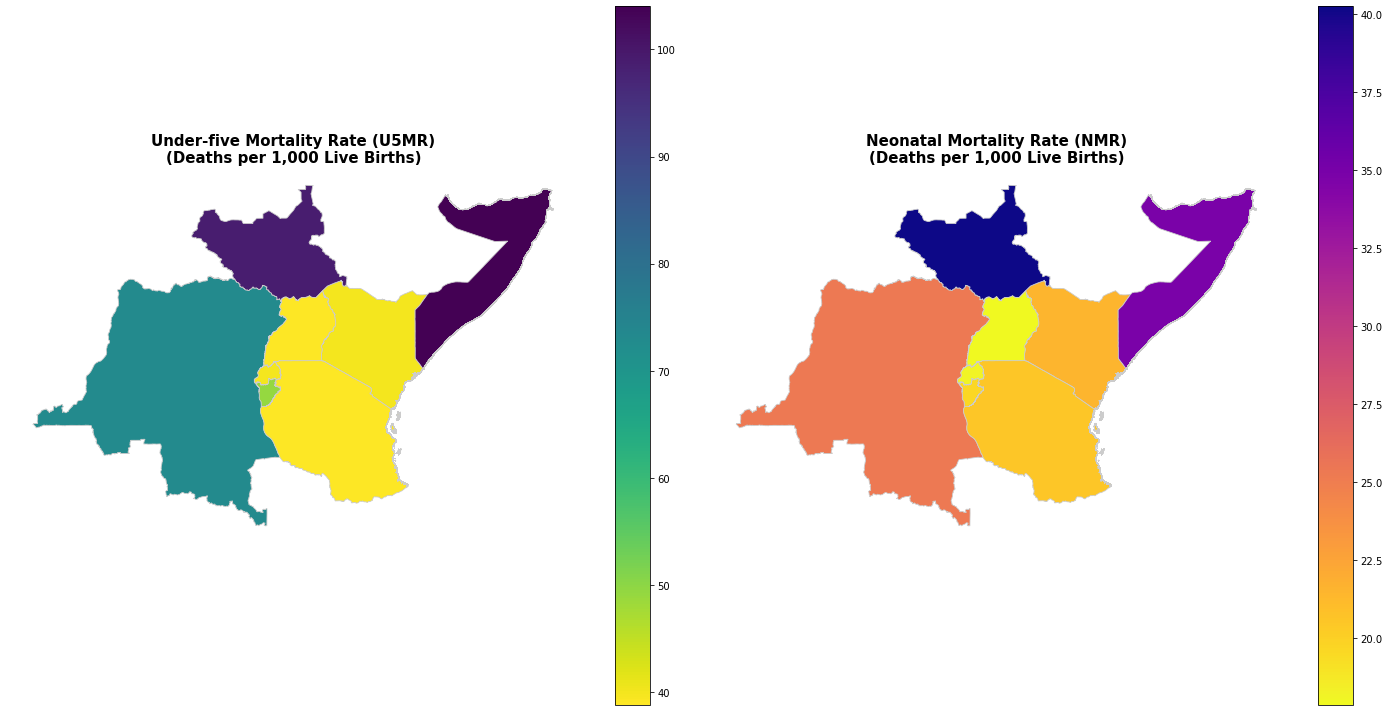

Plotting complete.


In [44]:
if 'merged_gdf_latest_per_country' in locals() or 'merged_gdf_latest_per_country' in globals():

    print("Generating map visualizations...")

    # --- Create the plot figure ---
    # Create a figure with 2 subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # Adjust figsize as needed

    # --- Plot 1: Under-five Mortality Rate (U5MR) ---
    ax1 = axes[0]
    merged_gdf_latest_per_country.plot(
        column='U5MR_Rate', # The column with the U5MR values
        cmap='viridis_r',     # Colormap (e.g., viridis, plasma, Reds). '_r' reverses it (higher values = darker for Reds/Blues etc)
        linewidth=0.8,       # Line width for country borders
        ax=ax1,              # Specify the axis to plot on
        edgecolor='0.8',     # Light grey edge color for borders
        legend=True,         # Show the color scale legend
        
        missing_kwds={'color': 'lightgrey', # Color for countries with missing data
                      'label': 'Missing data'}
    )
    ax1.set_title('Under-five Mortality Rate (U5MR)\n(Deaths per 1,000 Live Births)', fontsize=15,fontweight='bold')
    ax1.set_axis_off()

    # --- Plot 2: Neonatal Mortality Rate (NMR) ---
    ax2 = axes[1]
    merged_gdf_latest_per_country.plot(
        column='NMR_Rate',   # The column with the NMR values
        cmap='plasma_r',      # Choose a different colormap if desired
        linewidth=0.8,
        ax=ax2,
        edgecolor='0.8',
        legend=True,
        
        missing_kwds={'color': 'lightgrey',
                      'label': 'Missing data'}
    )
    ax2.set_title('Neonatal Mortality Rate (NMR)\n(Deaths per 1,000 Live Births)',fontsize=15,fontweight='bold')
    ax2.set_axis_off()

    # --- Display the plots ---
    plt.tight_layout() # Adjust layout to prevent titles/legends overlapping
    plt.show()
    print("Plotting complete.")

else:
    print("\nVariable 'merged_gdf_latest_per_country' not found.")
    print("Please ensure your merged GeoDataFrame is available before running the plotting code.")



### 3.Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plots).


In [47]:
u5mr_indicator="Under-five mortality rate"
nmr_indicator="Neonatal mortality rate"
indicators_of_interest = [u5mr_indicator, nmr_indicator]

In [49]:
df_filtered = eac_dataset[
    (eac_dataset['Indicator'].isin(indicators_of_interest)) &
    (eac_dataset['Sex'] == 'Total') &
    (eac_dataset['Wealth Quintile'] == 'Total') &
    (eac_dataset['Year'].notna()) &
    (eac_dataset['Observation Value'].notna()) &
    (eac_dataset['Observation Value'] >= 0)
].copy()

Recreated df_filtered with 647 rows.
Generating trend plots...


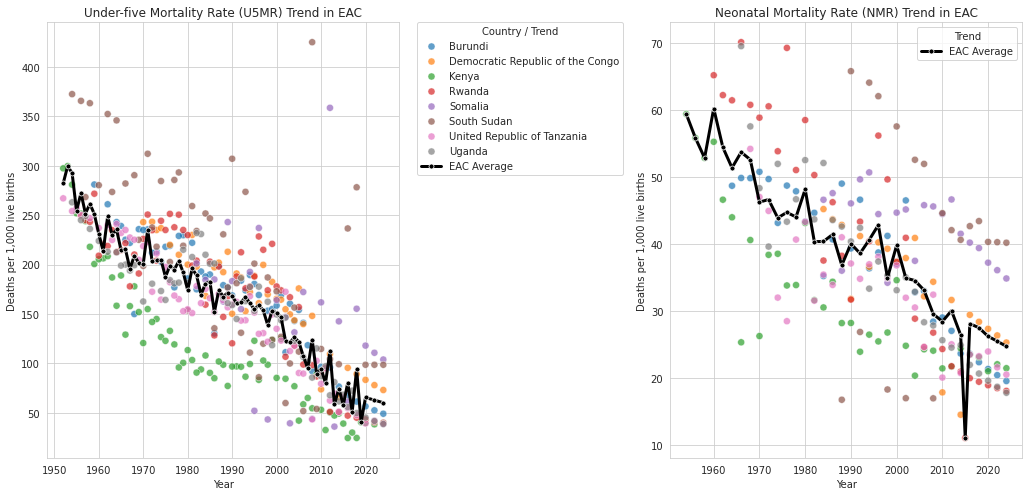

Trend plotting complete.


In [50]:
df_filtered = df_filtered[[
    'Geographic area', 'Indicator', 'Year', 'Observation Value'
]].rename(columns={'Geographic area': 'Country'})

df_filtered = df_filtered.drop_duplicates(subset=['Country', 'Indicator', 'Year'], keep='first')
df_filtered['Year'] = df_filtered['Year'].astype(float).astype(int) # Ensure Year is int for plotting
print(f"Recreated df_filtered with {len(df_filtered)} rows.")
# --- End Filtering Logic ---


# %% Calculate Average Trends
df_average_trends = df_filtered.groupby(['Year', 'Indicator'])['Observation Value'].mean().reset_index()

# Separate the data for plotting
df_u5mr = df_filtered[df_filtered['Indicator'] == u5mr_indicator].copy()
df_nmr = df_filtered[df_filtered['Indicator'] == nmr_indicator].copy()
df_average_u5mr = df_average_trends[df_average_trends['Indicator'] == u5mr_indicator].copy()
df_average_nmr = df_average_trends[df_average_trends['Indicator'] == nmr_indicator].copy()

# Drop NaNs just in case before plotting averages
df_average_u5mr.dropna(subset=['Year', 'Observation Value'], inplace=True)
df_average_nmr.dropna(subset=['Year', 'Observation Value'], inplace=True)

# %% Visualize Trends
print("Generating trend plots...")
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)

# Plot 1: U5MR Trend
ax1 = axes[0]
sns.scatterplot(data=df_u5mr, x='Year', y='Observation Value', hue='Country', alpha=0.7, s=50, ax=ax1, palette='tab10')
sns.lineplot(data=df_average_u5mr, x='Year', y='Observation Value', color='black', linewidth=3, label='EAC Average', ax=ax1, marker='o', markersize=5)
ax1.set_title('Under-five Mortality Rate (U5MR) Trend in EAC')
ax1.set_ylabel('Deaths per 1,000 live births')
ax1.set_xlabel('Year')
ax1.legend(title='Country / Trend', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot 2: NMR Trend
ax2 = axes[1]
sns.scatterplot(data=df_nmr, x='Year', y='Observation Value', hue='Country', alpha=0.7, s=50, ax=ax2, palette='tab10', legend=False)
sns.lineplot(data=df_average_nmr, x='Year', y='Observation Value', color='black', linewidth=3, label='EAC Average', ax=ax2, marker='o', markersize=5)
ax2.set_title('Neonatal Mortality Rate (NMR) Trend in EAC')
ax2.set_ylabel('Deaths per 1,000 live births')
ax2.set_xlabel('Year')
# Create a simple legend just for the average line on the second plot
line_handles, line_labels = ax2.get_legend_handles_labels()
if 'EAC Average' in line_labels:
     avg_handle = line_handles[line_labels.index('EAC Average')]
     ax2.legend(handles=[avg_handle], labels=['EAC Average'], title='Trend', loc='upper right')
else:
    # Fallback if label not found
     ax2.legend(title='Trend', loc='upper right')


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
print("Trend plotting complete.")


### 4.Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.

#### Highest Under-five Mortality Rate (U5MR):
1. Trend Plot: In the U5MR trend plot, the points for Somalia and South Sudan consistently appear at the top (highest values) in recent decades, significantly above the average line and other countries.

2. Map Plot: The U5MR map visualization you generated confirmed this, showing Somalia and South Sudan with the brightest colors, indicating the highest rates based on the latest available data point for each country. Numerically, we found Somalia had the single highest latest value (~104).
3. Highest Neonatal Mortality Rate (NMR):
4. Trend Plot: In the NMR trend plot, South Sudan's points are generally the highest in recent years, often detaching upwards from the other countries and the average. Somalia also trends higher than most others.
5. Map Plot: The NMR map visualization confirmed South Sudan had the highest rate visually, corresponding to the brightest color. Numerically, we found South Sudan had the highest latest value (~40).

**Summary of Highest Rates:**

> Highest U5MR: Somalia, with South Sudan also having a very high rate.

> Highest NMR: South Sudan, with Somalia also having a relatively high rate.